In [81]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [ ]:
# Load the CSV file 
df = pd.read_csv('car data.csv')

# Display the first few rows 
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [ ]:
# Drop the 'Car_Name' column
df = df.drop(columns=['Car_Name'])

In [5]:
# Add a new feature 'Car Age' instead of 'Year'
df['Car Age'] = 2024 - df['Year']
df = df.drop(columns=['Year'])

In [ ]:
# Encode categorical features using LabelEncoder
catergorical_cols = ['Fuel_Type', 'Selling_type', 'Transmission']
encoder = LabelEncoder()
for cols in catergorical_cols:
    df[cols] = encoder.fit_transform(df[cols])

In [7]:
# Split the data into training and testing sets
X = df.drop(columns=['Selling_Price'])
y = df['Selling_Price']

In [9]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [10]:
# Train a Random Forest Regressor model
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

In [12]:
# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}\n ")
print(f"Mean Squared Error: {mse}\n")
print(f"Root Mean Squared Error: {rmse}\n")
print(f"R-squared: {r2}\n")

Mean Absolute Error: 0.6479508196721315
 
Mean Squared Error: 0.931165688852459

Root Mean Squared Error: 0.9649692683461266

R-squared: 0.9595770757181235



# Exploratory Data Analysis

In [16]:
# Distribution of Selling Price
fig = px.histogram(df, x='Selling_Price', nbins=30, title='Distribution of Selling Price')
fig.show()

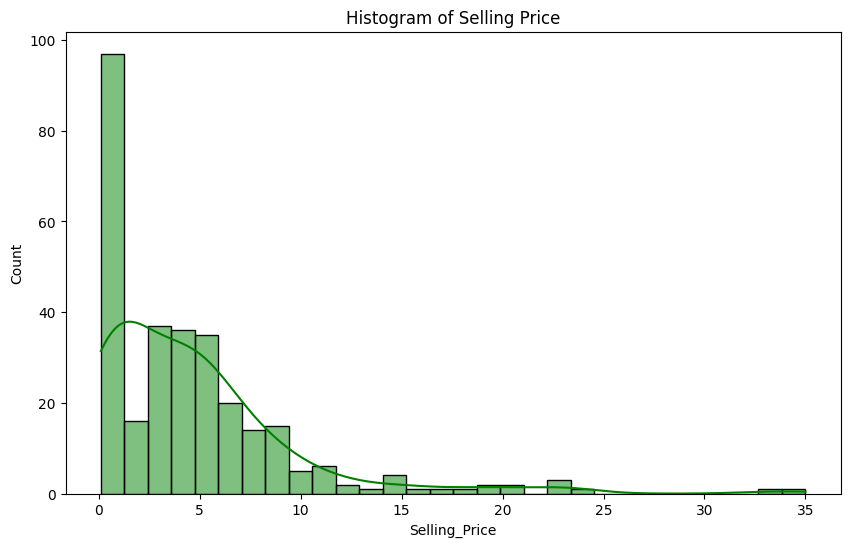

In [86]:
plt.figure(figsize=(10, 6))
sns.histplot(df["Selling_Price"], bins=30,color= "green", kde=True)
plt.title("Histogram of Selling Price")
plt.show()

In [18]:
# Fuel Type vs Selling Price
fig = px.box(df, x='Fuel_Type', y='Selling_Price', color='Fuel_Type', title='Fuel Type vs Selling Price')
fig.update_layout(width=800, height=600)
fig.show()

In [41]:
# Transmission vs Selling Price

fig = px.violin(df, x='Transmission', y='Selling_Price', box=True, points='all', color='Transmission',
                 color_discrete_sequence=px.colors.qualitative.Prism, title='Transmission vs Selling Price')
fig.update_layout(width=800, height=600)
fig.show()

In [47]:
# Selling Type vs Selling Price

fig = px.box(df, x='Selling_type', y='Selling_Price', color='Selling_type', color_discrete_map={'Dealer': 'red', 'Individual': 'blue'}, title='Selling Type vs Selling Price')
fig.update_layout(width=800, height=600)
fig.show()

In [51]:
# Car Age vs Selling Price

fig = px.scatter(df, x='Car Age', y='Selling_Price',
                 trendline="ols", color='Car Age', color_discrete_map={2024: 'red', 2023: 'blue'}, title='Car Age vs Selling Price')
fig.update_layout(width=1000, height=600)
fig.show()

In [50]:
# Present Price vs Selling Price

fig = px.scatter(df, x='Present_Price', y='Selling_Price',
                 trendline="ols", color='Present_Price', color_discrete_map={5: 'red', 9: 'blue'}, title='Present Price vs Selling Price')
fig.update_layout(width=1000, height=600)
fig.show()

In [52]:
# Driven kms vs Selling Price

fig = px.scatter(df, x='Driven_kms', y='Selling_Price',
                 trendline="ols", color='Driven_kms', color_discrete_map={27000: 'red', 43000: 'blue'}, title='Driven kms vs Selling Price')
fig.update_layout(width=1000, height=600)
fig.show()


In [53]:
# Ownership vs Selling Price

fig = px.box(df, x='Owner', y='Selling_Price', color='Owner', title='Ownership vs Selling Price')
fig.update_layout(width=800, height=600)
fig.show()

In [63]:
# Fuel Type Distribution

fig = px.pie(df, values='Selling_Price', names='Fuel_Type', color_discrete_sequence=px.colors.qualitative.Dark24, title='Fuel Type Distribution')
fig.update_layout(width=800, height=600)
fig.show()

In [79]:
# Transmission Type Distribution

fig = px.pie(df, values='Selling_Price', names='Transmission', color_discrete_sequence=px.colors.qualitative.D3, title='Transmission Type Distribution')
fig.update_layout(width=800, height=600)
fig.show()